lambda 함수는 데이터를 핸들링 하기 위해 pandas와 관련된 map, apply 등과 함께 유용하게 쓰인다.

def 키워드로 함수를 정의해서 사용하는 것 또한 가능하지만 간단한 전처리를 위해선 1회용 함수인 lambda 함수를 주로 사용한다.

# 일반적인 함수와 lambda 함수의 비교
---

일반적인 def 키워드로 생성하는 함수는 아래와 같다.

In [2]:
def plus(left, right):
    result = left + right
    return result

plus(10, 20)

30

이번에는 같은 함수를 lambda 함수를 이용해서 만들어보자

In [6]:
f = lambda x, y:x + y

f(10, 20)

30

위와 같이 lambda에 매개변수를 지정하고 :(콜론) 뒤 반환값으로 사용할 계산식을 지정한다.

그리고 lambda의 특징 중 하나는 특정 변수에 할당해서 사용해야한다. 이러한 이유로 lambda 함수가 익명 함수로 불리기도 한다.

아래의 그림을 보고 일반 함수와 lambda 함수의 차이를 이해하자.

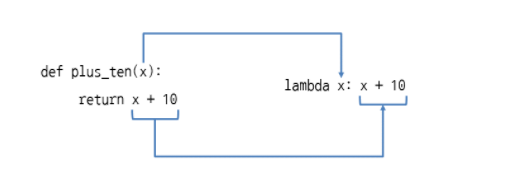

참고) 코딩도장

# lambda 표현식 자체를 호출
---

앞의 설명에서 lambda 함수는 특정 변수를 이용해서 사용해야 한다고 설명했다. 하지만 lambda 표현식 그 자체로 사용하는 방법이 없진 않다. 그 방법은 바로 괄호를 이용하는 것이다.

In [9]:
# 5의 제곱을 구함ㅠ

(lambda x: x**2)(5)

25

# lambda 표현식 안에서 변수 생성은 불가능하다
---

In [10]:
(lambda x: y = 10, x + y)(1)

SyntaxError: invalid syntax (<ipython-input-10-a9403626418d>, line 1)

하지만 lambda 표현식 밖에 있는 변수의 사용은 가능하다. 아래의 예시로 이해해보자

In [12]:
# 최종적으로 lambda 표현식에는 x에 5가 입력, y에 10이 입력된다.

y = 10
(lambda x: x + y)(5)

15

# lambda 함수 예제
---

In [16]:
# x와 y를 더하는 lambda 함수식

(lambda x, y: x+y)(10, 20)

30

In [18]:
# 대문자로 만드는 lamba 함수식

(lambda x: x.upper())('abc')

'ABC'

In [19]:
# 소문자로 만드는 lambda 함수식

(lambda x: x.lower())('ABC')

'abc'

- lambda 식에서 if문은 반드시 if else를 명시

In [30]:
# 짝수면 제곱, 아니면 그대로 유지

f = lambda x: x**2 if x % 2 == 0 else x

print(f(10))
print(f(5))

100
5


In [31]:
# str형이면 소문자로 아니면 그대로 유지

f = lambda x: x.lower() if type(x)=='str' else x

print(f('ABC'))
print(f(10))

ABC
10


# filter
---

In [36]:
# filter함수와 lambda 식을 이용해 짝수인 데이터를 추출하시오

arr = np.arange(10)

result = filter(lambda x: x%2==0, arr)

print(list(result))

[0, 2, 4, 6, 8]


# map
----

- map 함수는 Series를 대상으로 함수 적용

In [42]:
import pandas as pd

df = pd.DataFrame({"age":[30,25,25,12,40],
                  "height":[178,180,160,140,176],
                  "weight":[80,100,55,40,70]})

df

,age,height,weight
0,30,178,80
1,25,180,100
2,25,160,55
3,12,140,40
4,40,176,70


In [43]:
# map 함수와 lambda 함수식을 이용해 weight를 pund로 변환하시오 * 2.205

df['weight'] = df['weight'].map(lambda x: x*2.205)
df

,age,height,weight
0,30,178,176.400
1,25,180,220.500
2,25,160,121.275
3,12,140,88.200
4,40,176,154.350


# apply
---

- apply 함수는 전체 Series(컬럼)을 대상으로 함수를 적용합니다.

In [46]:
# 학생 데이터프레임의 전체 컬럼의 최댓값 - 최솟값을 계산하시오

df.apply(lambda x: x.max() - x.min())

age        28.0
height     40.0
weight    132.3
dtype: float64

# applymap
---

- applymap 함수는 DF의 모든 element에 대해 함수를 적용합니다. (axis 인자 X)


In [47]:
# 데이터프레임의 전체 element에 대해 음수로 변경하시오

df.applymap(lambda x: -x)

,age,height,weight
0,-30,-178,-176.400
1,-25,-180,-220.500
2,-25,-160,-121.275
3,-12,-140,-88.200
4,-40,-176,-154.350
